In [1]:
#subtask 1.1

#To load the Raw data file into Data Frame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import re
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
import plotly as pl 
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from imblearn.under_sampling import ClusterCentroids
init_notebook_mode(connected=True)

In [2]:
%matplotlib inline
df = pd.read_csv('chocolate.csv', na_values = ["",'','\xc2\xa0'], header = 0)

In [3]:
#Changing column names
columns_name = ['Company', 'Bean_Origin', 'REF', 'Review_Year', 'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin'] 
df.columns = columns_name
df

,Company,Bean_Origin,REF,Review_Year,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela


In [4]:
#It just shows 1 missing value in two columns but we know that there are more missing values
# the values are hidden as string '\xa0' so we replace them manually
print("Original data Frame missing values\n", df.isnull().sum())
print("Hidden Missing values \n",df['Bean_Type'].values)
df = df.replace('\xa0',np.NaN )
#Lets check for missing values after replacing
print("Missing values after replacing \xa0 with NaN in our dataset: \n", df.isnull().sum().sort_values(ascending=False))
print("total records are", df.shape[0])
print("total columns are", df.shape[1])

Original data Frame missing values
 Company              0
Bean_Origin          0
REF                  0
Review_Year          0
Cocoa_Percentage     0
Company_Location     0
Rating               0
Bean_Type            1
Broad_Bean_Origin    1
dtype: int64
Hidden Missing values 
 ['Criollo, Trinitario' 'Blend' 'Matina' ... '\xa0' '\xa0' '\xa0']
Missing values after replacing   with NaN in our dataset: 
 Bean_Type            751
Broad_Bean_Origin     62
Rating                 0
Company_Location       0
Cocoa_Percentage       0
Review_Year            0
REF                    0
Bean_Origin            0
Company                0
dtype: int64
total records are 1500
total columns are 9


In [5]:
print("Values BEFORE assigning function \n" , df['Broad_Bean_Origin'].value_counts())
## Text preparation (correction) func
def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$ ,|Madagascar,Java,Papua New Guinea', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$, |Ecuador,Madagascar,Papua New Guinea', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, str(text))
    return text

#Since only 62 values are missing we will fill the missing values with mode of the column
df['Broad_Bean_Origin'] = df['Broad_Bean_Origin'].fillna(df['Broad_Bean_Origin'].mode()[0])

df['Broad_Bean_Origin'] = df['Broad_Bean_Origin'].str.replace('.', '').apply(txt_prep)
#Lets check the values now
print("Values AFTER assigning function \n" , df['Broad_Bean_Origin'].value_counts())

Values BEFORE assigning function 
 Venezuela                    174
Ecuador                      164
Peru                         140
Dominican Republic           120
Madagascar                   120
                            ... 
Africa, Carribean, C. Am.      1
Peru, Dom. Rep                 1
Nigeria                        1
Venezuela, Java                1
Ecuador, Costa Rica            1
Name: Broad_Bean_Origin, Length: 92, dtype: int64
Values AFTER assigning function 
 Venezuela                                    236
Ecuador                                      164
Peru                                         140
Dominican Republic                           136
Madagascar                                   120
                                            ... 
Martinique                                     1
Grenada,Papua New Guinea,Hawaii,Haiti,Mad      1
Venezuela,Bolivia,Dominican Republic           1
Africa,Carribean,Central America               1
Venezuela,Ghana             

In [6]:
#Fixing the issues in Company Location Names so we can do geo visualisation later on
df['Company_Location'] = df['Company_Location'].str.replace('Eucador','Ecuador')\
                               .str.replace('Amsterdam','Netherlands')\
                               .str.replace('Belgium','Belgium')\
                               .str.replace('Domincan Republic', 'Dominican Republic')\
                               .str.replace('Niacragua', 'Nicaragua')\
                               .str.replace('U.K.', 'United Kingdom')\
                               .str.replace('U.S.A.', 'United States of America')

In [7]:
df.head()

,Company,Bean_Origin,REF,Review_Year,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,Venezuela
2,Potomac,Upala w/ nibs,647,2011,70%,United States of America,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,United States of America,3.50,NaN,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [8]:
#Converting String into Integers for better classification

df['Cocoa_Percentage'] = df['Cocoa_Percentage'].str.replace('%', '')
df['Cocoa_Percentage'] = df['Cocoa_Percentage'].str.replace('.', '')
df['Cocoa_Percentage'] = df['Cocoa_Percentage'].astype(int)

In [9]:
df.head()

,Company,Bean_Origin,REF,Review_Year,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,Valrhona,Manjari,129,2007,64,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80,Switzerland,3.25,Blend,Venezuela
2,Potomac,Upala w/ nibs,647,2011,70,United States of America,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70,United States of America,3.50,NaN,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65,Colombia,3.50,CCN51,Colombia


In [10]:
df.Bean_Origin.values

array(['Manjari', 'Grand Cru Blend No.1, 5 yr. Anniversary Ed',
       'Upala w/ nibs', ..., 'Blend', 'Hacienda Las Trincheras',
       'Pepiniere, single Cote'], dtype=object)

<AxesSubplot:xlabel='Cocoa_Percentage', ylabel='count'>

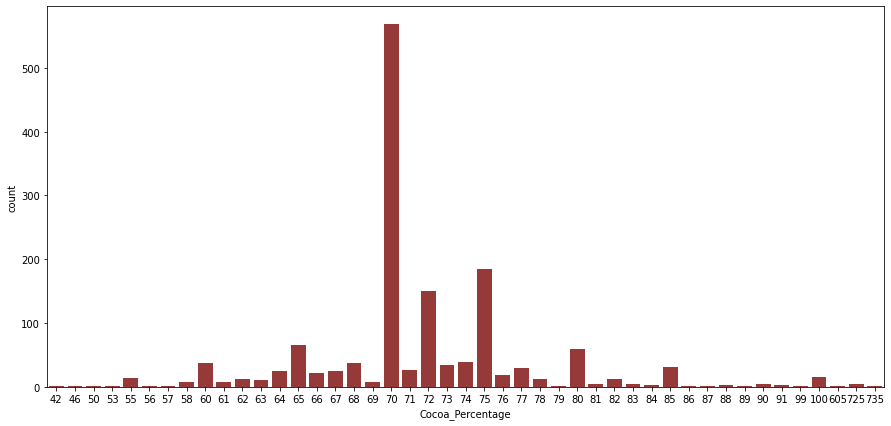

In [11]:
#We can see the values are not distributed properly
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa_Percentage', data = df, color = 'brown')

<AxesSubplot:xlabel='Rating', ylabel='count'>

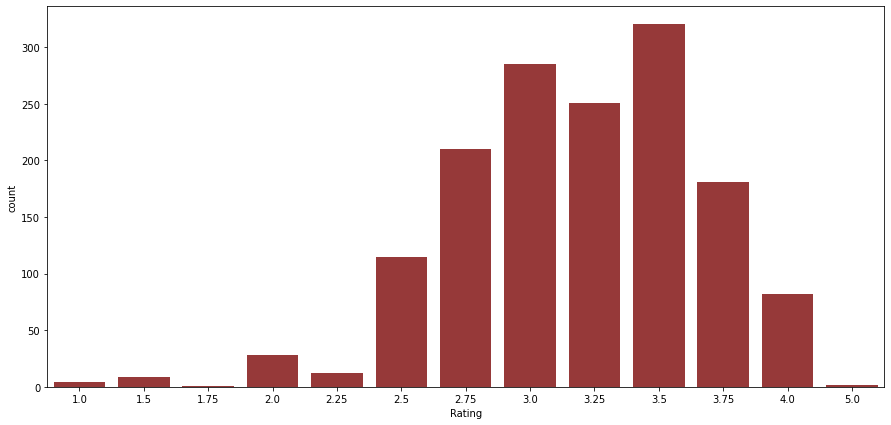

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'Rating', data = df, color = 'brown')

In [13]:
print("Total Unique Values are: \n" , df.apply(lambda col: col.nunique()))

Total Unique Values are: 
 Company              391
Bean_Origin          893
REF                  439
Review_Year           12
Cocoa_Percentage      45
Company_Location      56
Rating                13
Bean_Type             35
Broad_Bean_Origin     90
dtype: int64


In [14]:
df['Bean_Origin'].value_counts().head(10).sum()

241

In [15]:
len(df['Bean_Origin'])

1500

In [16]:
print(df['Broad_Bean_Origin'].values)

['Madagascar' 'Venezuela' 'Costa Rica' ... 'Venezuela,Trinidad,Ecuador'
 'Venezuela' 'St Lucia']


The most values in the column Company, is 
 Soma        39
Bonnat      23
Fresco      21
Pralus      20
A. Morin    19
Name: Company, dtype: int64


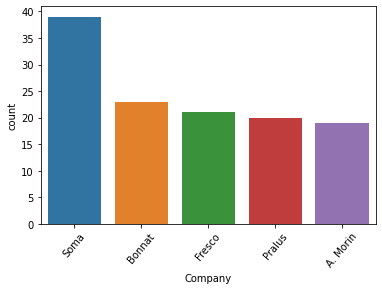

The most values in the column Bean_Origin, is 
 Madagascar            42
Ecuador               37
Peru                  37
Dominican Republic    33
Venezuela             18
Name: Bean_Origin, dtype: int64


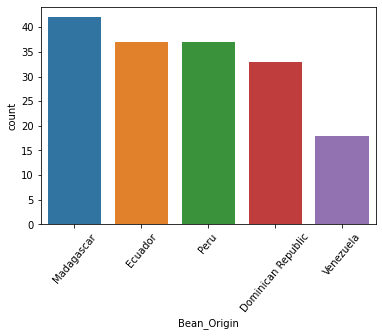

The most values in the column REF, is 
 414     10
387      9
439      8
1454     7
478      7
Name: REF, dtype: int64


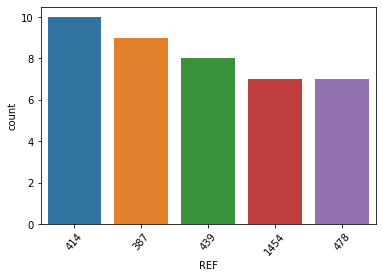

The most values in the column Review_Year, is 
 2015    238
2014    212
2016    180
2012    156
2013    151
Name: Review_Year, dtype: int64


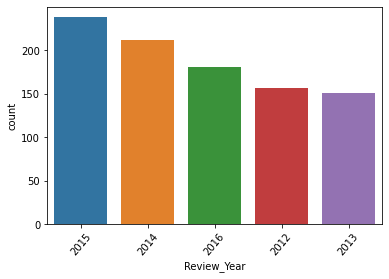

The most values in the column Cocoa_Percentage, is 
 70    568
75    185
72    150
65     65
80     60
Name: Cocoa_Percentage, dtype: int64


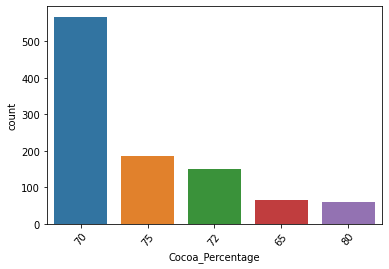

The most values in the column Company_Location, is 
 United States of America    632
France                      124
Canada                      108
United Kingdom               79
Italy                        59
Name: Company_Location, dtype: int64


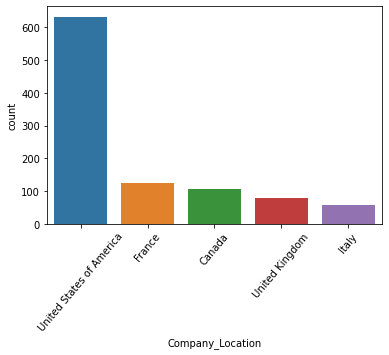

The most values in the column Rating, is 
 3.50    320
3.00    285
3.25    251
2.75    210
3.75    181
Name: Rating, dtype: int64


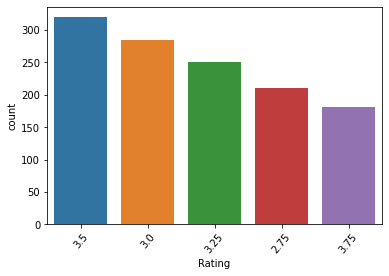

The most values in the column Bean_Type, is 
 Trinitario              342
Criollo                 128
Forastero                67
Forastero (Nacional)     46
Blend                    34
Name: Bean_Type, dtype: int64


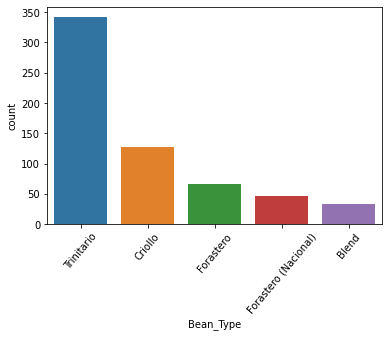

The most values in the column Broad_Bean_Origin, is 
 Venezuela             236
Ecuador               164
Peru                  140
Dominican Republic    136
Madagascar            120
Name: Broad_Bean_Origin, dtype: int64


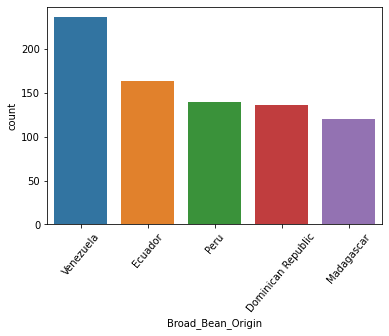

In [17]:
for i in df.columns:
    sns.countplot(data=df, x=i, order=pd.value_counts(df[i]).iloc[:5].index)
    print("The most values in the column {}, is \n {}".format(i,pd.value_counts(df[i]).iloc[:5]))
    plt.xticks(rotation=50)
    plt.show()

In [18]:
df.describe(include='all')
df.isnull().sum()

Company                0
Bean_Origin            0
REF                    0
Review_Year            0
Cocoa_Percentage       0
Company_Location       0
Rating                 0
Bean_Type            751
Broad_Bean_Origin      0
dtype: int64

In [19]:
df = df.drop('Bean_Type', 1)

In [20]:
#We will fix the above problem by specifying range if the percent is above 100 then convert it to float for example
#605 will be 60 
def normaliseIt(percentage):
    if percentage > 100:
        percentage = int(str(percentage)[:2])
    return percentage
df_geo = pd.DataFrame(df)

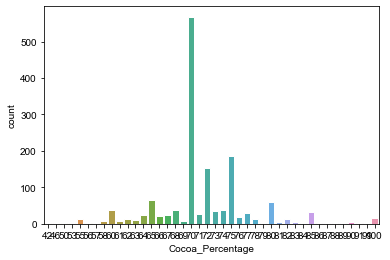

In [21]:
for i in df.columns:
    sns.countplot(data= df, x=df['Cocoa_Percentage'].apply(normaliseIt))
    sns.set(rc={'figure.figsize':(10,10)})


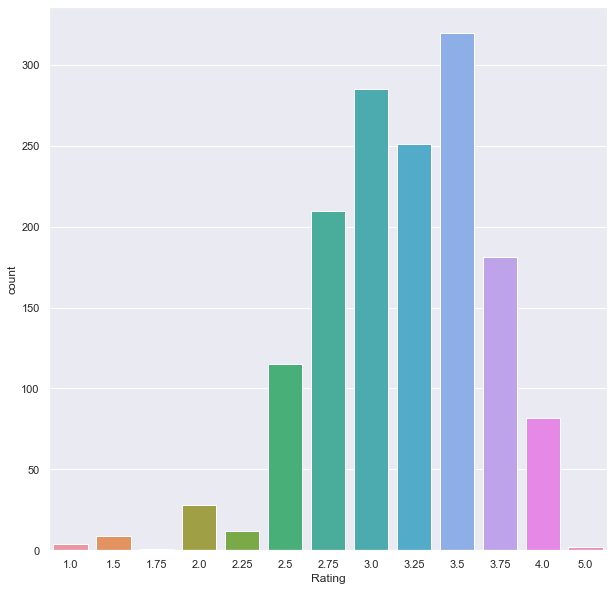

In [22]:
for i in df.columns:
    sns.countplot(data= df, x=df['Rating'])
    sns.set(rc={'figure.figsize':(20,20)})

In [23]:
def rating_conv(rating):
    
    rating = int(rating)
    return rating
    
#Lets apply it
df['Rating'] = df['Rating'].apply(rating_conv)


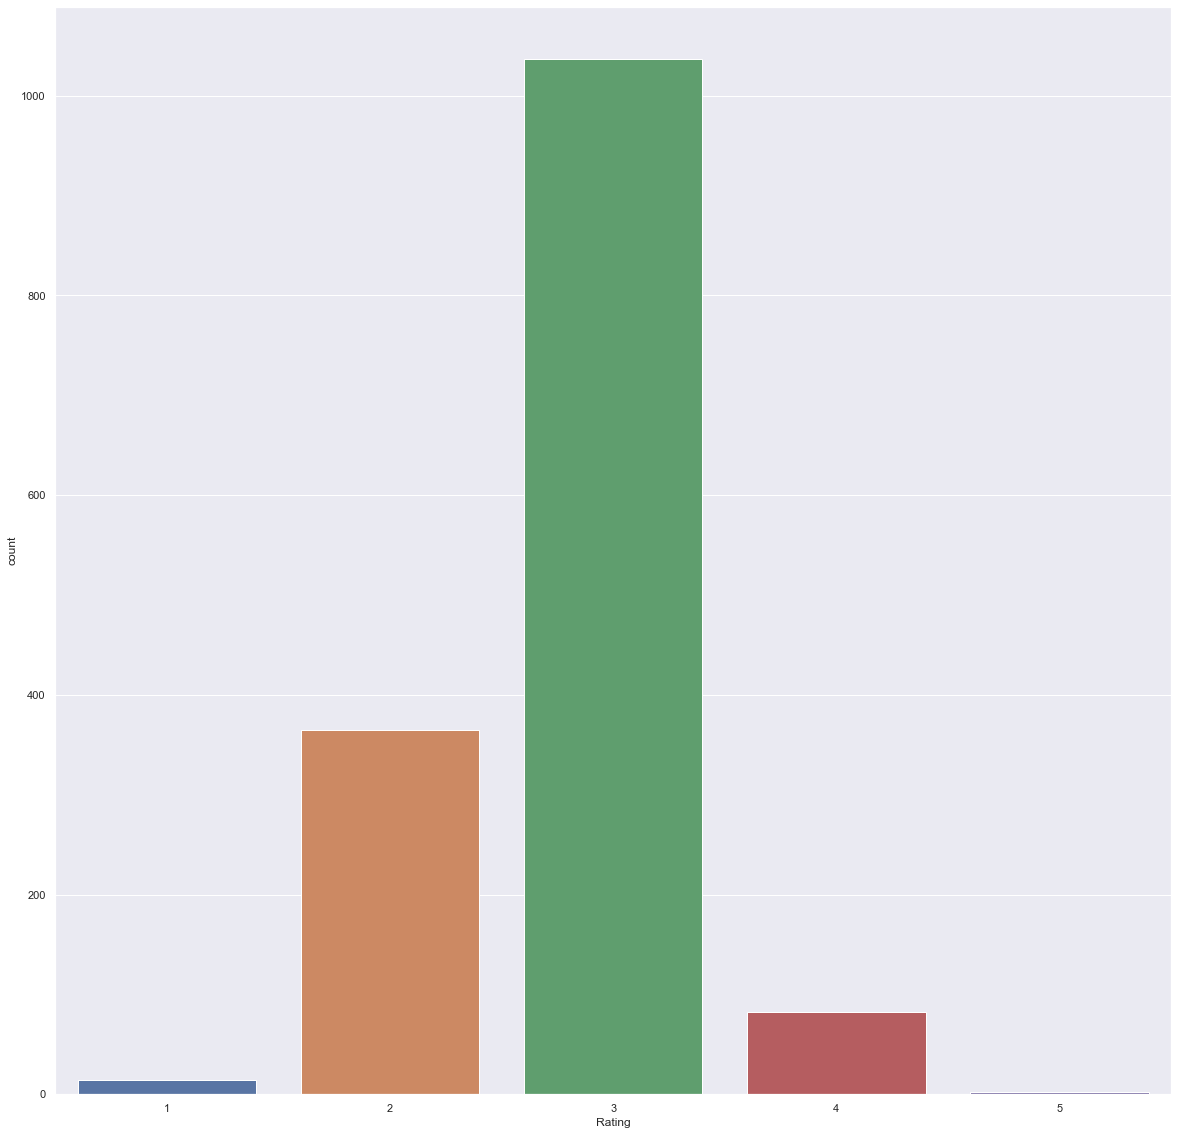

In [24]:
for i in df.columns:
    sns.countplot(data= df, x=df['Rating'])
    sns.set(rc={'figure.figsize':(10,10)})

In [25]:
data = dict(type = 'choropleth',
            locations = df['Broad_Bean_Origin'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = "Delta",
            z=df['Rating'],
            marker = dict(line = dict(color = "black",width = 1)),
            colorbar = {'title':'Ratings','len':0.30,'lenmode':'fraction'})

#Initializing the layout variable
layout = dict(geo = dict(scope='world'))

#Initializing the object for graph_objs.Figure class
worldmap = gobj.Figure(data = [data],layout = layout)

#plotting the map
iplot(worldmap)
print("The top mentioned Countries are \n {}".format(df['Broad_Bean_Origin'].value_counts()[:3]))

The top mentioned Countries are 
 Venezuela    236
Ecuador      164
Peru         140
Name: Broad_Bean_Origin, dtype: int64


In [26]:
data = dict(type = 'choropleth',
            locations = df['Company_Location'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = "Delta",
            z=df['Rating'],
            marker = dict(line = dict(color = "black",width = 1)),
            colorbar = {'title':'Ratings','len':0.30,'lenmode':'fraction'})

#Initializing the layout variable
layout = dict(geo = dict(scope='world'))

#Initializing the object for graph_objs.Figure class
worldmap = gobj.Figure(data = [data],layout = layout)

#plotting the map
iplot(worldmap)
print("The top mentioned Countries are \n {}".format(df['Company_Location'].value_counts()[:3]))

The top mentioned Countries are 
 United States of America    632
France                      124
Canada                      108
Name: Company_Location, dtype: int64


In [27]:
print("Total Unique Values in our Data Frame are: \n" , df.apply(lambda col: col.nunique()))

Total Unique Values in our Data Frame are: 
 Company              391
Bean_Origin          893
REF                  439
Review_Year           12
Cocoa_Percentage      45
Company_Location      56
Rating                 5
Broad_Bean_Origin     90
dtype: int64


In [28]:
df = df.drop(['Bean_Origin', 'Company', 'REF'], 1)
print("Total Unique Values in our Data Frame are: \n" , df.apply(lambda col: col.nunique()))

Total Unique Values in our Data Frame are: 
 Review_Year          12
Cocoa_Percentage     45
Company_Location     56
Rating                5
Broad_Bean_Origin    90
dtype: int64


In [29]:
for col in df:
    print(df[col].unique())


[2007 2014 2011 2015 2016 2008 2009 2013 2010 2012 2006 2017]
[ 64  80  70  65  68  73  72  74  60  75  55  67  63  99  77 725  62  85
  78  82  53  66  88 100  83  69  71  76  61  57  58  90  91  86  84  42
  46  89 735 605  81  79  56  50  87]
['France' 'Switzerland' 'United States of America' 'Colombia' 'Argentina'
 'Japan' 'United Kingdom' 'Canada' 'Scotland' 'Germany' 'Ecuador'
 'Guatemala' 'Mexico' 'Nicaragua' 'Sweden' 'Belgium' 'Italy' 'St. Lucia'
 'Brazil' 'New Zealand' 'Australia' 'Denmark' 'Lithuania' 'Spain' 'Fiji'
 'Austria' 'Madagascar' 'Costa Rica' 'Hungary' 'Portugal' 'Vietnam' 'Peru'
 'Ireland' 'Venezuela' 'Israel' 'Chile' 'Dominican Republic' 'Netherlands'
 'Bolivia' 'Puerto Rico' 'Suriname' 'Iceland' 'South Africa' 'Grenada'
 'Martinique' 'Czech Republic' 'Honduras' 'Poland' 'South Korea' 'Russia'
 'India' 'Ghana' 'Sao Tome' 'Philippines' 'Singapore' 'Wales']
[4 3 2 5 1]
['Madagascar' 'Venezuela' 'Costa Rica' 'Nicaragua' 'Colombia' 'Ecuador'
 'Trinidad' 'Dominican Rep

In [30]:
dummies = pd.get_dummies(df['Company_Location']).rename(columns=lambda x: 'Company_Location___' + str(x))
#Ratings less than 3 are low quality and ratings equal to 3 or greater than 3 are good quality
df['Rating'].values[df['Rating'] < 3] = 0
df['Rating'].values[df['Rating'] >= 3] = 1

In [31]:
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Company_Location', 'Broad_Bean_Origin'], axis=1)

In [32]:
df.columns

Index(['Review_Year', 'Cocoa_Percentage', 'Rating',
       'Company_Location___Argentina', 'Company_Location___Australia',
       'Company_Location___Austria', 'Company_Location___Belgium',
       'Company_Location___Bolivia', 'Company_Location___Brazil',
       'Company_Location___Canada', 'Company_Location___Chile',
       'Company_Location___Colombia', 'Company_Location___Costa Rica',
       'Company_Location___Czech Republic', 'Company_Location___Denmark',
       'Company_Location___Dominican Republic', 'Company_Location___Ecuador',
       'Company_Location___Fiji', 'Company_Location___France',
       'Company_Location___Germany', 'Company_Location___Ghana',
       'Company_Location___Grenada', 'Company_Location___Guatemala',
       'Company_Location___Honduras', 'Company_Location___Hungary',
       'Company_Location___Iceland', 'Company_Location___India',
       'Company_Location___Ireland', 'Company_Location___Israel',
       'Company_Location___Italy', 'Company_Location___Japan'

In [33]:
df.head()

,Review_Year,Cocoa_Percentage,Rating,Company_Location___Argentina,Company_Location___Australia,Company_Location___Austria,Company_Location___Belgium,Company_Location___Bolivia,Company_Location___Brazil,Company_Location___Canada,...,Company_Location___Spain,Company_Location___St. Lucia,Company_Location___Suriname,Company_Location___Sweden,Company_Location___Switzerland,Company_Location___United Kingdom,Company_Location___United States of America,Company_Location___Venezuela,Company_Location___Vietnam,Company_Location___Wales
0,2007,64,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,80,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2011,70,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2015,70,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2016,65,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#as we can see we have an underbalanced target variable so we will try ClusterCentroids sampling technique to complement the
#minority class 0
num_0 = len(df[df['Rating']==0])
num_1 = len(df[df['Rating']==1])
print(num_0,num_1)

379 1121


In [35]:
cc = ClusterCentroids()
X, y = cc.fit_sample(X=df.drop('Rating', 1), y=df['Rating'])

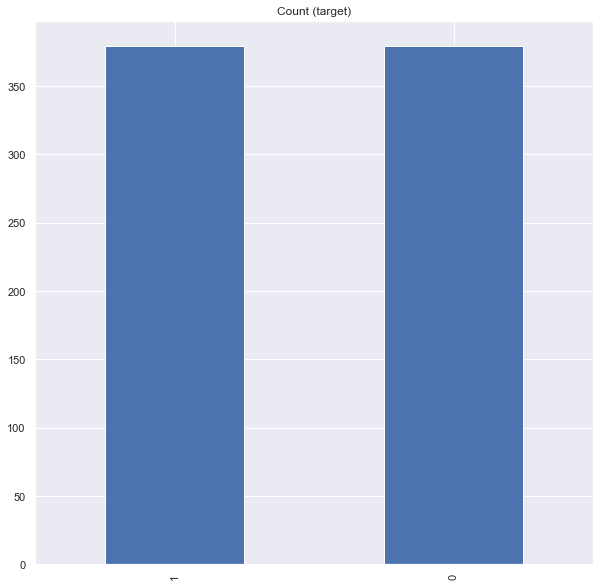

In [36]:
y.value_counts().plot(kind='bar', title='Count (target)');

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.3, random_state=50)

Log_Regression
              precision    recall  f1-score   support

 Low Quality       0.67      0.68      0.67       117
High Quality       0.65      0.65      0.65       111

    accuracy                           0.66       228
   macro avg       0.66      0.66      0.66       228
weighted avg       0.66      0.66      0.66       228

[[79 38]
 [39 72]]
Company_Location___Denmark               0.740048
Company_Location___Netherlands           0.614590
Company_Location___Dominican Republic    0.611365
Company_Location___Vietnam               0.462706
Company_Location___Argentina             0.462655
Company_Location___Hungary               0.423750
Company_Location___Scotland              0.423165
Company_Location___Switzerland           0.395504
Company_Location___Brazil                0.296882
Company_Location___Mexico                0.267549
dtype: float64
Dec_Tree
              precision    recall  f1-score   support

 Low Quality       0.70      0.62      0.65       117
High Q

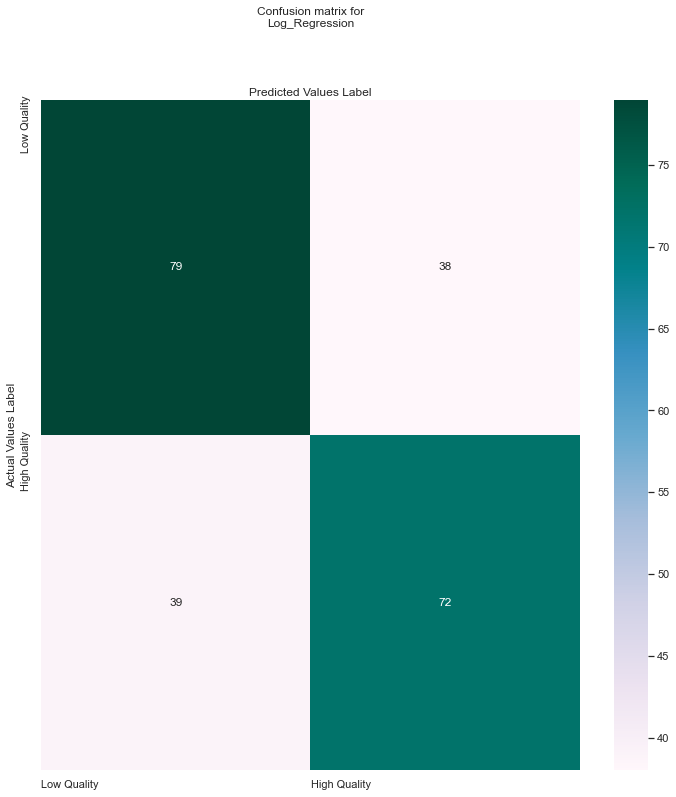

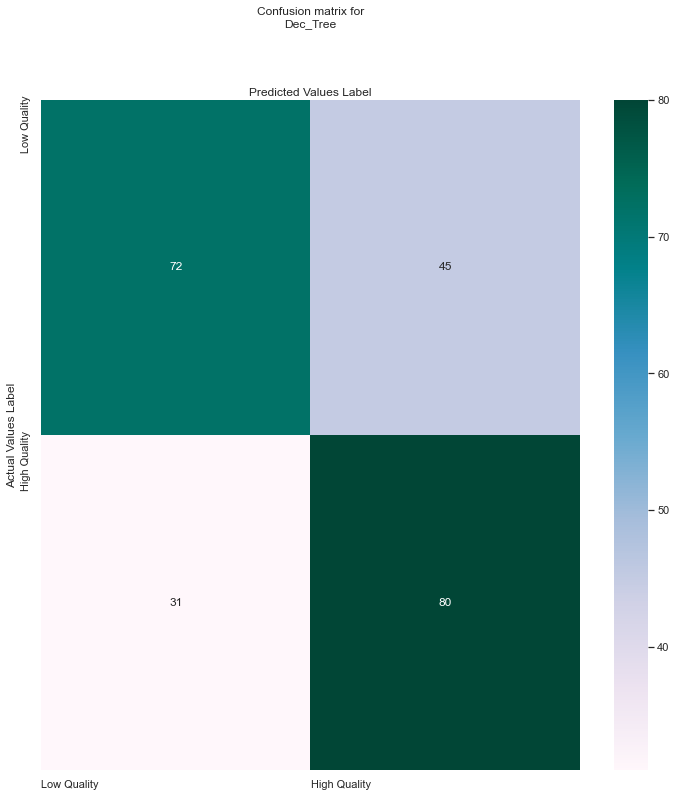

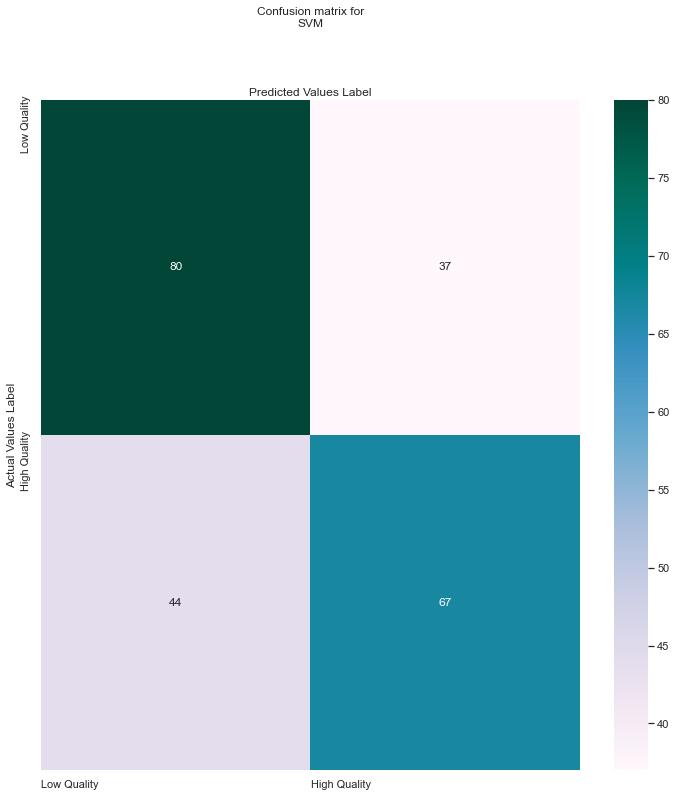

In [38]:
#define all of our models
models = [
          ('Log_Regression', LogisticRegression(solver='liblinear')), 
          ('Dec_Tree', DecisionTreeClassifier(max_depth=5)),
          ('SVM', SVC(kernel = 'linear', gamma='scale'))
        ]
#we keep list of dfs, results, names
dfs = []
results = []
names = []
target_names = ['Low Quality', 'High Quality'] #0 are students at risk of leaving, 1 not risky
for name, model in models:
    #apply 10 split kfold on models
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=100)
    #cross validate all models and return training score for all
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, return_train_score=True)
    #fit all models on x and y train
    clf = model.fit(x_train, y_train)
    #apply predictions on x test for all models
    y_pred = clf.predict(x_test)
    #print the name of all the models involved
    print(name)
    #we create a classification for all the models on the actual and predicted values
    classification = classification_report(y_test, y_pred, target_names = target_names)
    #print the classification report
    print(classification)
    #we create confusion matrix for all the models on actual and predicted values
    confusion_matrix_students = confusion_matrix(y_test, y_pred)
    #print array of confusion matrix
    print(confusion_matrix_students)
    #lets plot the confusion matrix now by creating sub plots
    fig, ax = plt.subplots()
    # create heatmap for confusion matrix after setting the x and y ticks
    sns.heatmap(pd.DataFrame(confusion_matrix_students), annot=True, cmap="PuBuGn" ,fmt='g')
    #We set the title of confusion matrix and model name on top of image
    ax.xaxis.set_label_position("top")
    students_ticks = np.arange(len(target_names))
    #We plot the confusion matrix with the ticks being the target names 0 is Low quality and 1 high quality
    plt.xticks(students_ticks, target_names, ha='left', linespacing = 0.2)
    plt.yticks(students_ticks, target_names, ma='right')
    plt.tight_layout()
    plt.title('Confusion matrix for\n' + name, y=1.1)
    plt.ylabel('Actual Values Label')
    plt.xlabel('Predicted Values Label')
    sns.set(rc={'figure.figsize':(10,10)})
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    #the final dataframe has the model names, model training scores, testing scores, score time and fit time
    final = pd.concat(dfs, ignore_index=True)
    # get importance from each algorithm and since decision tree has different method of getting features
    #we use the if statement to match the model name to their feature importance func
    if name == 'Log_Regression':
        importance = clf.coef_[0]
        coeffecients = pd.DataFrame(importance, x_train.columns)
        coeffecients.columns = ['Coeffecient']
        feat_importances = pd.Series(importance, index=x_train.columns)
        print(feat_importances.nlargest(10))
    if name == 'Dec_Tree':
        importances = np.round(clf.feature_importances_,3)
        coeffecients = pd.DataFrame(importances, x_train.columns) 
        coeffecients.columns = ['Coeffecient']
        feat_importances = pd.Series(importances, index=x_train.columns)
        print(feat_importances.nlargest(10))
    if name == 'SVM':
        importances = np.round(clf.coef_[0],3)
        coeffecients = pd.DataFrame(importances, x_train.columns)
        coeffecients.columns = ['Coeffecient']
        print(coeffecients.nlargest(10, coeffecients.columns))